In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [182]:
# Загружаем данные
train = pd.read_excel(
    io = 'titanic.xlsx',
    sheet_name = 'train',
).rename(
    columns = {
        "Целевая переменная": 'target',
        "Социальный класс": "class",
        "Пол":"gender",
        "Возраст":"age",
        "БСС":"bss",
        "РД":"rd",
        "Номер билета":"ticket",
        "Стоимость проезда":"price",
        "Место":"place",
        "Порт посадки": 'port',
        "Лодка": "boat"

    }
)
test = pd.read_excel(
    io = 'titanic.xlsx',
    sheet_name = 'test',
).rename(
    columns = {
        "Целевая переменная": 'target',
        "Социальный класс": "class",
        "Пол":"gender",
        "Возраст":"age",
        "БСС":"bss",
        "РД":"rd",
        "Номер билета":"ticket",
        "Стоимость проезда":"price",
        "Место":"place",
        "Порт посадки": 'port',
        "Лодка": "boat"

    }
)
# Делаем копию для финального файла
test_final = test.copy()

# Исследованиe данных

In [183]:
# Смотрим общую информацию
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  1295 non-null   int64  
 1   class   1295 non-null   int64  
 2   gender  1295 non-null   object 
 3   age     1034 non-null   float64
 4   bss     1295 non-null   int64  
 5   rd      1295 non-null   int64  
 6   ticket  1295 non-null   object 
 7   price   1294 non-null   float64
 8   place   290 non-null    object 
 9   port    1293 non-null   object 
 10  boat    479 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 111.4+ KB


Есть пропуски данных в age, rd, price, place, port и boat

In [184]:
# Смотрим общую информацию
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  0 non-null      float64
 1   class   14 non-null     int64  
 2   gender  14 non-null     object 
 3   age     12 non-null     float64
 4   bss     14 non-null     int64  
 5   rd      14 non-null     int64  
 6   ticket  14 non-null     object 
 7   price   14 non-null     float64
 8   place   5 non-null      object 
 9   port    14 non-null     object 
 10  boat    7 non-null      object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ KB


Есть пропуски данных в age,place и boat

In [185]:
# Анализ классов - 3 класса больше
train['class'].value_counts()

class
3    704
1    319
2    272
Name: count, dtype: int64

In [186]:
# Анализ пола - Мужчин больше
train['gender'].value_counts()

gender
male      835
female    460
Name: count, dtype: int64

In [187]:
# Статистика по возрасту
train['age'].describe()

count    1034.000000
mean       29.845422
std        14.470938
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [188]:
# Статистика по количество братьев / сестер / супругов - большинство одиночки
train['bss'].value_counts()

bss
0    886
1    310
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [189]:
# Анализ - количества детей / родителей
train['rd'].value_counts()

rd
0    990
1    168
2    113
3      8
4      6
5      6
6      2
9      2
Name: count, dtype: int64

In [190]:
# Анализ целевого показателя и класса - пассажиры первых дух классов достигают чаще целевого показателя
train.groupby('class').target.value_counts()

class  target
1      1         198
       0         121
2      0         156
       1         116
3      0         525
       1         179
Name: count, dtype: int64

In [191]:
train[['class', 'target']].groupby(['class'], as_index=False).mean()

,class,target
0,1,0.620690
1,2,0.426471
2,3,0.254261


In [192]:
# Анализ целевого показателя и поля - женщины чаще достигали целевого показателя
train.groupby('gender').target.value_counts()

gender  target
female  1         333
        0         127
male    0         675
        1         160
Name: count, dtype: int64

In [193]:
train[['gender', 'target']].groupby(['gender'], as_index=False).mean()

,gender,target
0,female,0.723913
1,male,0.191617


В целом можно продолжить анализ данных с различных сторон и все зависит от цели и задач

# Дополнение данных для тренировки

In [194]:
# Комбинируем датасеты
train_test_data = [train, test] # combining train and test dataset

In [195]:
# Заполняем age
for dataset in train_test_data:
    age_avg = dataset['age'].mean()
    age_std = dataset['age'].std()
    age_null_count = dataset['age'].isnull().sum()

    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['age'][np.isnan(dataset['age'])] = age_null_random_list
    dataset['age'] = dataset['age'].astype(int)

train['age_band'] = pd.cut(train['age'], 5)

print (train[['age_band', 'target']].groupby(['age_band'], as_index=False).mean())


        age_band    target
0  (-0.08, 16.0]  0.538462
1   (16.0, 32.0]  0.357576
2   (32.0, 48.0]  0.344444
3   (48.0, 64.0]  0.443396
4   (64.0, 80.0]  0.153846


In [196]:
# Преобразуем пол в числительное значение
for dataset in train_test_data:
    dataset['gender'] = dataset['gender'].map( {'female': 1, 'male': 0} ).astype(int)


In [197]:
# Заполняем порт отправления на базе популярного значения 'S'

for dataset in train_test_data:
    dataset['port'] = dataset['port'].fillna('S')



In [198]:
# Также преобразуем в числительное значение
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['port'] = dataset['port'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [199]:
# Категории по возрасту

for dataset in train_test_data:
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age'] = 4

train.head()



,target,class,gender,age,bss,rd,ticket,price,place,port,boat,age_band
0,1,1,1,1,0,0,24160,211.3375,B5,0,2,"(16.0, 32.0]"
1,1,1,0,0,1,2,113781,151.5500,C22 C26,0,11,"(-0.08, 16.0]"
2,0,1,1,0,1,2,113781,151.5500,C22 C26,0,NaN,"(-0.08, 16.0]"
3,0,1,0,1,1,2,113781,151.5500,C22 C26,0,NaN,"(16.0, 32.0]"
4,0,1,1,1,1,2,113781,151.5500,C22 C26,0,NaN,"(16.0, 32.0]"


In [200]:
# Заполняем пустую оплату
for dataset in train_test_data:
    dataset['price'] = dataset['price'].fillna(train['price'].median())


In [201]:
# Добавляем сегменты по цене
train['price_band'] = pd.qcut(train['price'], 4)
print (train[['price_band', 'target']].groupby(['price_band'], as_index=False).mean())

          price_band    target
0    (-0.001, 7.896]  0.229167
1    (7.896, 14.454]  0.280757
2   (14.454, 31.138]  0.443396
3  (31.138, 512.329]  0.574074


In [202]:
# Делаем маппинг между price и price_band

for dataset in train_test_data:
    dataset.loc[ dataset['price'] <= 7.91, 'price'] = 0
    dataset.loc[(dataset['price'] > 7.91) & (dataset['price'] <= 14.454), 'price'] = 1
    dataset.loc[(dataset['price'] > 14.454) & (dataset['price'] <= 31), 'price']   = 2
    dataset.loc[ dataset['price'] > 31, 'price'] = 3
    dataset['price'] = dataset['price'].astype(int)

In [203]:
# Объединяем данные по семье
for dataset in train_test_data:
    dataset['family_size'] = dataset['bss'] +  dataset['rd'] + 1

print (train[['family_size', 'target']].groupby(['family_size'], as_index=False).mean())

   family_size    target
0            1  0.303185
1            2  0.530702
2            3  0.566879
3            4  0.697674
4            5  0.272727
5            6  0.200000
6            7  0.250000
7            8  0.000000
8           11  0.000000


In [204]:
# Добавляем признак одиночек
for dataset in train_test_data:
    dataset['is_alone'] = 0
    dataset.loc[dataset['family_size'] == 1, 'is_alone'] = 1

print (train[['is_alone', 'target']].groupby(['is_alone'], as_index=False).mean())

   is_alone    target
0         0  0.500000
1         1  0.303185


In [205]:
# Оставляем только нужно для работы модели
features_drop = ['bss', 'rd', 'ticket', 'place', 'family_size', 'boat']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['age_band', 'price_band'], axis=1)

In [206]:
train.head()

,target,class,gender,age,price,port,is_alone
0,1,1,1,1,3,0,1
1,1,1,0,0,3,0,0
2,0,1,1,0,3,0,0
3,0,1,0,1,3,0,0
4,0,1,1,1,3,0,0


In [207]:
train.head()

,target,class,gender,age,price,port,is_alone
0,1,1,1,1,3,0,1
1,1,1,0,0,3,0,0
2,0,1,1,0,3,0,0
3,0,1,0,1,3,0,0
4,0,1,1,1,3,0,0


<Axes: >

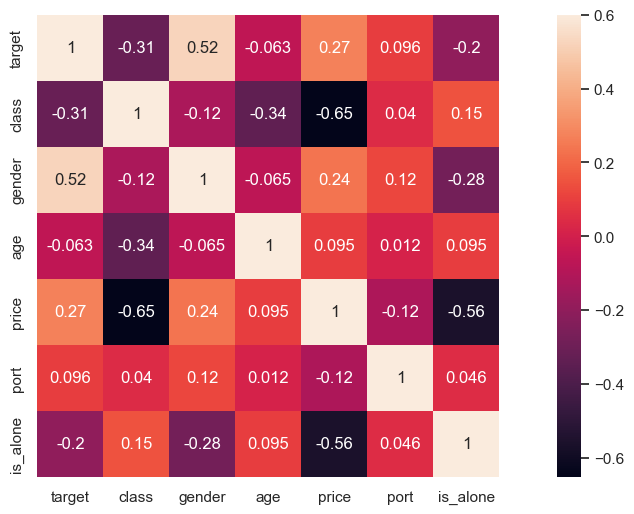

In [208]:
# Строим матрицу корреляци признаков
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)



# Моделирование

In [209]:


X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop("target", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape



((1295, 6), (1295,), (14, 6))

In [210]:
# Используем Логистическую регрессия для моделирования
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)

In [211]:
test_final['target'] = y_pred_log_reg
test_final.to_csv('titanic_final.csv', index=False)